In [1]:
#installing necessary packages
import math
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV


#reading in data
df = pd.read_csv("Data/integrated_dataset.csv", header=0).dropna()

In [2]:
#splitting data into independent and dependent variables
X=df[["QS2023 International Student Ratio", "QS2023 Employment Outcomes", 
"QS2023 Academic Reputation", "QS2023 Citations per Faculty", "QS2023 Employer Reputation"]].values
y=df["THE2020 Overall Score"].values

#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [3]:
#Assessing for best hyperparameter alpha-lasso cross-validation

lasso2=Lasso()
parameters={'alpha': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}
lasso_choice=GridSearchCV(lasso2, parameters, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
lasso_choice.fit(X, y)

print(lasso_choice.best_params_)

{'alpha': 0.01}


In [18]:
#Lasso Regression: Scores

lasso=Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
training_score_ls=lasso.score(X_train, y_train)
testing_score_ls=lasso.score(X_test, y_test)

msel = mean_squared_error(y_train, lasso.predict(X_train))

print("-Lasso Regression-")
print("Mean Squared Error-Training: {}".format(msel))
print("Root Mean Squared Error-Training: {}".format(math.sqrt(msel)))
print("Lasso Training Score: {:.5f}".format(training_score_ls))
print("Lasso Testing Score: {:.5f}".format(testing_score_ls))

-Lasso Regression-
Mean Squared Error-Training: 70.3138731131564
Root Mean Squared Error-Training: 8.385336791874039
Lasso Training Score: 0.75614
Lasso Testing Score: 0.83760


Text(0.5, 1.0, 'Lasso Regression: Predicting THE 2020 Overall Scores')

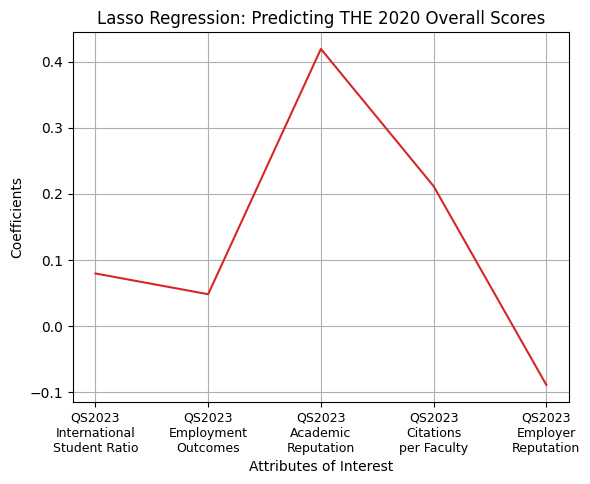

In [5]:
#Lasso Regression: Graph

ticklabels=["QS2023\nInternational\nStudent Ratio", "QS2023\nEmployment\nOutcomes", 
"QS2023\nAcademic\nReputation", "QS2023\nCitations\nper Faculty", "QS2023\nEmployer\nReputation"]

#predictors, same as X
attributes=df[["QS2023 International Student Ratio", "QS2023 Employment Outcomes",
"QS2023 Academic Reputation", "QS2023 Citations per Faculty", "QS2023 Employer Reputation"]].columns

#graphical feature selection: plotting coefficients
lasso_coef = lasso.fit(X, y).coef_
plt.plot(range(len(attributes)), lasso_coef, 'C3')
plt.xticks(range(len(attributes)), ticklabels, rotation=0, fontsize=9)

plt.xlabel("Attributes of Interest")
plt.ylabel("Coefficients")
plt.grid(True)
plt.title("Lasso Regression: Predicting THE 2020 Overall Scores")


In [15]:
#Assessing for best hyperparameter alpha-ridge cross-validation

ridge2=Ridge()
parameters = {'alpha': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}
ridge_choice=GridSearchCV(ridge2, parameters, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
ridge_choice.fit(X, y)

print(ridge_choice.best_params_)

{'alpha': 0.01}


In [20]:
#Ridge Regression:

ridge=Ridge(alpha = 0.01)
ridge.fit(X_train, y_train)
yridge_prediction=ridge.predict(X_test)
training_score_rs=ridge.score(X_train, y_train)
testing_score_rs=ridge.score(X_test, y_test)

mser = mean_squared_error(y_train, ridge.predict(X_train))

print("-Ridge Regression-")
print("Mean Squared Error-Training: {}".format(mser))
print("Root Mean Squared Error-Training: {}".format(math.sqrt(mser)))
print("Ridge Training Score {:.5f}".format(training_score_rs))
print("Ridge Testing Score {:.5f}".format(testing_score_rs))

-Ridge Regression-
Mean Squared Error-Training: 70.31387098564748
Root Mean Squared Error-Training: 8.385336665015155
Ridge Training Score 0.75614
Ridge Testing Score 0.83761


In [14]:
#Testing Ridge Model on QS data: University of Pennsylvania
#THE Overall Score: 89.6
#list of scores below in same order as graph
pred_row=[66.1, 100, 96.5, 70.9, 92.5]
y_pred = ridge.predict([pred_row])
print(y_pred)

[76.70063768]
